<a href="https://colab.research.google.com/github/zyf2021/fcc_book_recommendation_knn/blob/main/fcc_book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [3]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip


!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2024-07-20 19:29:36--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‚Äòbook-crossings.zip‚Äô

book-crossings.zip  100%[===================>]  24.88M  68.7MB/s    in 0.4s    

2024-07-20 19:29:38 (68.7 MB/s) - ‚Äòbook-crossings.zip‚Äô saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


In [3]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

## –®–∞–≥ 1: –ò–º–ø–æ—Ä—Ç –∏ –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö

1. **–ò–º–ø–æ—Ä—Ç–∏—Ä—É–π—Ç–µ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏:**
   - –í–∞–º –ø–æ–Ω–∞–¥–æ–±—è—Ç—Å—è –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –¥–ª—è —Ä–∞–±–æ—Ç—ã —Å –¥–∞–Ω–Ω—ã–º–∏ (`pandas`) –∏ –¥–ª—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∞–ª–≥–æ—Ä–∏—Ç–º–∞ K-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π (`sklearn.neighbors`).

2. **–ó–∞–≥—Ä—É–∑–∏—Ç–µ –¥–∞–Ω–Ω—ã–µ:**
   - –ó–∞–≥—Ä—É–∑–∏—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç, –∫–æ—Ç–æ—Ä—ã–π –≤–∫–ª—é—á–∞–µ—Ç –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –∫–Ω–∏–≥–∞—Ö, –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è—Ö –∏ –∏—Ö –æ—Ü–µ–Ω–∫–∞—Ö.

3. **–û—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**
   - –£–¥–∞–ª–∏—Ç–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–≤–∏–ª–∏ –º–µ–Ω–µ–µ 200 –æ—Ü–µ–Ω–æ–∫, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.
   - –£–¥–∞–ª–∏—Ç–µ –∫–Ω–∏–≥–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –æ—Ü–µ–Ω–µ–Ω—ã –º–µ–Ω–µ–µ 100 —Ä–∞–∑, —á—Ç–æ–±—ã —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–∏—Ç—å—Å—è –Ω–∞ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∫–Ω–∏–≥–∞—Ö.

### –®–∞–≥ 2: –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

1. **–°–æ–∑–¥–∞–Ω–∏–µ –º–∞—Ç—Ä–∏—Ü—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å-–∫–Ω–∏–≥–∞:**
   - –°—Ñ–æ—Ä–º–∏—Ä—É–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É, –≥–¥–µ —Å—Ç—Ä–æ–∫–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —Å—Ç–æ–ª–±—Ü—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –∫–Ω–∏–≥–∏, –∞ –∑–Ω–∞—á–µ–Ω–∏—è ‚Äî –æ—Ü–µ–Ω–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –¥–∞–ª–∏ –∫–Ω–∏–≥–∞–º.

2. **–ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π:**
   - –†–µ—à–∏—Ç–µ, –∫–∞–∫ –±—É–¥–µ—Ç–µ –∑–∞–ø–æ–ª–Ω—è—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –º–∞—Ç—Ä–∏—Ü–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω—É–ª—è–º–∏ –∏–ª–∏ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏).

### –®–∞–≥ 3: –ú–æ–¥–µ–ª—å K-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π

1. **–°–æ–∑–¥–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏:**
   - –ò—Å–ø–æ–ª—å–∑—É–π—Ç–µ –∞–ª–≥–æ—Ä–∏—Ç–º K-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π (`NearestNeighbors` –∏–∑ `sklearn.neighbors`).
   - –ù–∞—Å—Ç—Ä–æ–π—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏, —Ç–∞–∫–∏–µ –∫–∞–∫ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ—Å–µ–¥–µ–π (k) –∏ –º–µ—Ç—Ä–∏–∫—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ).

2. **–û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏:**
   - –û–±—É—á–∏—Ç–µ –º–æ–¥–µ–ª—å –Ω–∞ –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã –ø–æ–¥–≥–æ—Ç–æ–≤–∏–ª–∏.

### –®–∞–≥ 4: –§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π

1. **–°–æ–∑–¥–∞–Ω–∏–µ —Ñ—É–Ω–∫—Ü–∏–∏ `get_recommends`:**
   - –≠—Ç–∞ —Ñ—É–Ω–∫—Ü–∏—è –¥–æ–ª–∂–Ω–∞ –ø—Ä–∏–Ω–∏–º–∞—Ç—å –Ω–∞–∑–≤–∞–Ω–∏–µ –∫–Ω–∏–≥–∏ –∏ –Ω–∞—Ö–æ–¥–∏—Ç—å –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –¥–ª—è –¥–∞–Ω–Ω–æ–π –∫–Ω–∏–≥–∏.
   - –§—É–Ω–∫—Ü–∏—è –¥–æ–ª–∂–Ω–∞ –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å —Å–ø–∏—Å–æ–∫ –∏–∑ 5 –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ—Ö–æ–∂–∏—Ö –∫–Ω–∏–≥ –∏ –∏—Ö —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –¥–∞–Ω–Ω–æ–π –∫–Ω–∏–≥–∏.

### –ü–æ–¥—Å–∫–∞–∑–∫–∏ –ø–æ –∫–∞–∂–¥–æ–º—É —à–∞–≥—É:

1. **–ò–º–ø–æ—Ä—Ç –∏ –æ—á–∏—Å—Ç–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**
   - –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ –¥–∞–Ω–Ω—ã–µ –∑–∞–≥—Ä—É–∂–∞—é—Ç—Å—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –∏ –∏–º–µ—é—Ç –Ω—É–∂–Ω—ã–π —Ñ–æ—Ä–º–∞—Ç.
   - –ü—Ä–æ–≤–µ—Ä—å—Ç–µ, —á—Ç–æ —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –æ—Ü–µ–Ω–æ–∫ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –∫–Ω–∏–≥ –≤—ã–ø–æ–ª–Ω–µ–Ω–∞ –ø—Ä–∞–≤–∏–ª—å–Ω–æ.

2. **–ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö:**
   - –ü–æ—Å—Ç—Ä–æ–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å-–∫–Ω–∏–≥–∞ —Å –ø–æ–º–æ—â—å—é `pivot_table`.
   - –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ, –∫–∞–∫ –±—É–¥–µ—Ç–µ –æ–±—Ä–∞–±–∞—Ç—ã–≤–∞—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è.

3. **–ú–æ–¥–µ–ª—å K-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π:**
   - –í—ã–±–µ—Ä–∏—Ç–µ –º–µ—Ç—Ä–∏–∫—É —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è, –∫–æ—Ç–æ—Ä–∞—è –ª—É—á—à–µ –≤—Å–µ–≥–æ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –≤–∞—à–µ–π –∑–∞–¥–∞—á–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ).
   - –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ—Å–µ–¥–µ–π (k) –¥–ª—è –≤–∞—à–µ–π –º–æ–¥–µ–ª–∏.

4. **–§—É–Ω–∫—Ü–∏—è –¥–ª—è —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π:**
   - –£–±–µ–¥–∏—Ç–µ—Å—å, —á—Ç–æ —Ñ—É–Ω–∫—Ü–∏—è –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ –Ω–∞—Ö–æ–¥–∏—Ç –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π.
   - –ü—Ä–æ–≤–µ—Ä—å—Ç–µ, —á—Ç–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç —Ñ—É–Ω–∫—Ü–∏–∏ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É–µ—Ç –æ–∂–∏–¥–∞–µ–º–æ–º—É —Ñ–æ—Ä–º–∞—Ç—É.

–≠—Ç–∏ —à–∞–≥–∏ –∏ –ø–æ–¥—Å–∫–∞–∑–∫–∏ –ø–æ–º–æ–≥—É—Ç –≤–∞–º —Å—Ç—Ä—É–∫—Ç—É—Ä–∏—Ä–æ–≤–∞—Ç—å —Ä–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ –∏ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ —Ä–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π –¥–ª—è –∫–Ω–∏–≥.

In [4]:

isbn_counts = df_ratings['isbn'].value_counts()
isbn_counts

isbn
0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: count, Length: 340556, dtype: int64

### –£–¥–∞–ª–∏—Ç–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –æ—Å—Ç–∞–≤–∏–ª–∏ –º–µ–Ω–µ–µ 200 –æ—Ü–µ–Ω–æ–∫, —á—Ç–æ–±—ã –∏–∑–±–µ–∂–∞—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–æ–π –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ—Å—Ç–∏.

In [5]:
user_counts = df_ratings['user'].value_counts()
user_counts = user_counts[user_counts > 200].index
filtered_ratings = df_ratings[df_ratings['user'].isin(user_counts)]

In [6]:
filtered_ratings

user        isbn  rating
1456     277427  002542730X    10.0
1457     277427  0026217457     0.0
1458     277427  003008685X     8.0
1459     277427  0030615321     0.0
1460     277427  0060002050     0.0
...         ...         ...     ...
1147612  275970  3829021860     0.0
1147613  275970  4770019572     0.0
1147614  275970   896086097     0.0
1147615  275970  9626340762     8.0
1147616  275970  9626344990     0.0

[526356 rows x 3 columns]

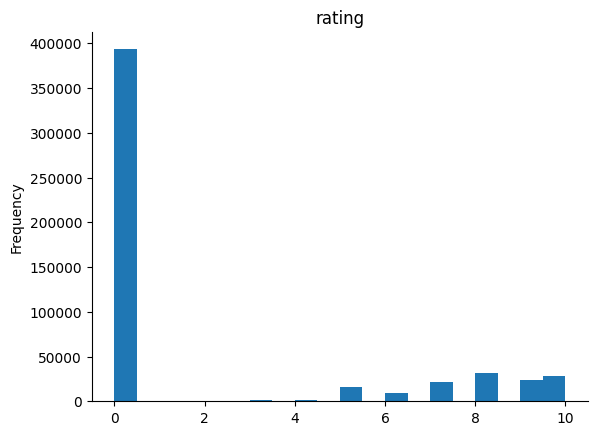

In [7]:
# @title rating

from matplotlib import pyplot as plt
filtered_ratings['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

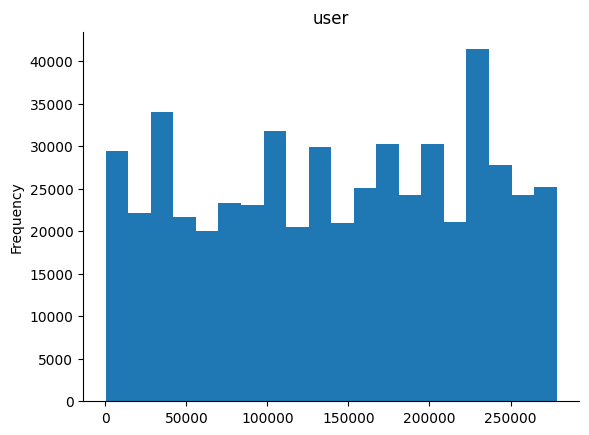

In [8]:
# @title user

from matplotlib import pyplot as plt
filtered_ratings['user'].plot(kind='hist', bins=20, title='user')
plt.gca().spines[['top', 'right',]].set_visible(False)

### –£–¥–∞–ª–∏—Ç–µ –∫–Ω–∏–≥–∏, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –æ—Ü–µ–Ω–µ–Ω—ã –º–µ–Ω–µ–µ 100 —Ä–∞–∑, —á—Ç–æ–±—ã —Å–æ—Å—Ä–µ–¥–æ—Ç–æ—á–∏—Ç—å—Å—è –Ω–∞ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∫–Ω–∏–≥–∞—Ö.

In [9]:
isbn_counts = df_ratings['isbn'].value_counts()
isbn_counts = isbn_counts[isbn_counts > 100].index
filtered_ratings = filtered_ratings[filtered_ratings['isbn'].isin(isbn_counts)]
filtered_ratings

user        isbn  rating
1456     277427  002542730X    10.0
1469     277427  0060930535     0.0
1471     277427  0060934417     0.0
1474     277427  0061009059     9.0
1484     277427  0140067477     0.0
...         ...         ...     ...
1147304  275970  0804111359     0.0
1147436  275970  140003065X     0.0
1147439  275970  1400031346     0.0
1147440  275970  1400031354     0.0
1147441  275970  1400031362     0.0

[49254 rows x 3 columns]

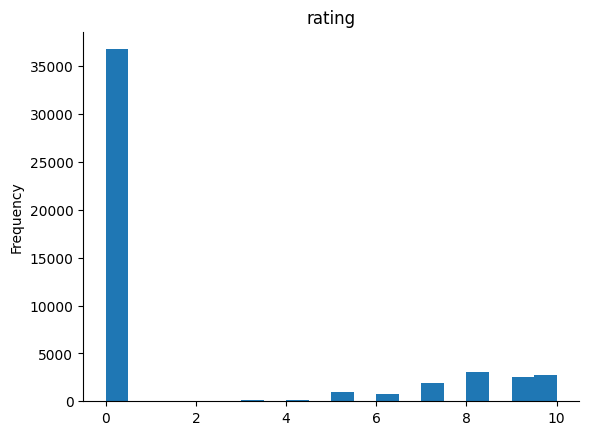

In [10]:
# @title rating

from matplotlib import pyplot as plt
filtered_ratings['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

## –®–∞–≥ 2: –ü–æ–¥–≥–æ—Ç–æ–≤–∫–∞ –¥–∞–Ω–Ω—ã—Ö

### –†–µ—à–∏—Ç–µ, –∫–∞–∫ –±—É–¥–µ—Ç–µ –∑–∞–ø–æ–ª–Ω—è—Ç—å –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤ –º–∞—Ç—Ä–∏—Ü–µ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –Ω—É–ª—è–º–∏ –∏–ª–∏ —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏). Mean
- –ü–æ—Å–º–æ—Ç—Ä–∏–º —Å–∫–æ–ª—å–∫–æ –ø—Ä–æ–ø—â–µ–Ω–Ω—ã—Ö –±—É–¥–µ—Ç –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ
- —Å–≥—Ä—É–ø–ø–∏—Ä—É–µ–º –ø—Ä–æ–ø—É—â–µ–Ω–Ω—ã–µ –ø–æ isbn –∏ –Ω–∞–π–¥–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∞—Ä—Ñ–º–∏—Ç–∏—á–µ—Å–∫–æ–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ
- –∑–∞–º–µ–Ω–∏–º 0 –∏ NaN –Ω–∞ mean

In [11]:
missing_values = filtered_ratings.isnull().sum()
print(missing_values)

zero_values = (filtered_ratings == 0).sum()
print(zero_values)

user      0
isbn      0
rating    0
dtype: int64
user          0
isbn          0
rating    36757
dtype: int64


In [12]:
# –ù–∞–π—Ç–∏ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è —Å—Ç–æ–ª–±—Ü–∞ 'rating', –∏—Å–∫–ª—é—á–∞—è –Ω—É–ª–∏
mean_rating = filtered_ratings['rating'][filtered_ratings['rating'] != 0].mean()
mean_rating

7.975594

In [13]:
# –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ ISBN, –∏—Å–∫–ª—é—á–∞—è –Ω—É–ª–∏
isbn_mean_ratings = filtered_ratings[filtered_ratings['rating'] != 0].groupby('isbn')['rating'].mean()

In [14]:
# –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ ISBN, –∏—Å–∫–ª—é—á–∞—è –Ω—É–ª–∏
isbn_mean_ratings = filtered_ratings[filtered_ratings['rating'] != 0].groupby('isbn')['rating'].mean()
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–º–µ–Ω—ã –Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
def replace_zero_with_mean(row):
    if row['rating'] == 0:
        return isbn_mean_ratings[row['isbn']]
    else:
        return row['rating']

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫ DataFrame
filtered_ratings['rating'] = filtered_ratings.apply(replace_zero_with_mean, axis=1)
print("DataFrame –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã –Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ ISBN:")
print(filtered_ratings)

DataFrame –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã –Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ ISBN:
           user        isbn     rating
1456     277427  002542730X  10.000000
1469     277427  0060930535   7.480000
1471     277427  0060934417   8.333333
1474     277427  0061009059   9.000000
1484     277427  0140067477   8.125000
...         ...         ...        ...
1147304  275970  0804111359   6.750000
1147436  275970  140003065X   8.750000
1147439  275970  1400031346   8.473684
1147440  275970  1400031354   8.342857
1147441  275970  1400031362   8.555555

[49254 rows x 3 columns]


<ipython-input-14-9a8d0937f9db>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_ratings['rating'] = filtered_ratings.apply(replace_zero_with_mean, axis=1)


In [15]:
unique_users = filtered_ratings['user'].nunique()
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π:", unique_users)

unique_isbn = filtered_ratings['isbn'].nunique()
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–Ω–∏–≥:", unique_isbn)


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: 882
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∫–Ω–∏–≥: 721


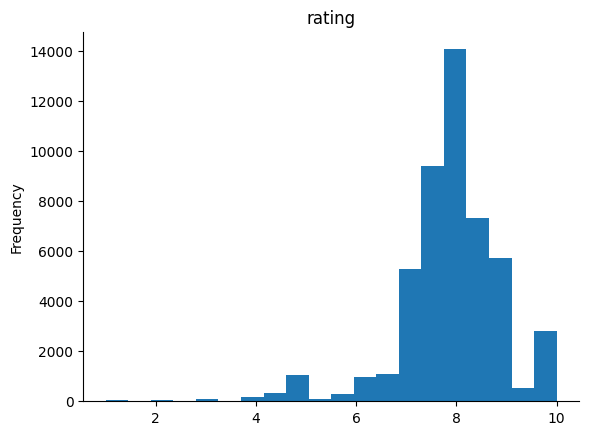

In [16]:
# @title rating

from matplotlib import pyplot as plt
filtered_ratings['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

# –®–∞–≥ 3: –ê–Ω–∞–ª–∏–∑ –∫–Ω–∏–≥

In [17]:
df_books.isnull().sum()

isbn      0
title     0
author    2
dtype: int64

In [18]:
(df_books == 0).sum()

isbn      0
title     0
author    0
dtype: int64

In [19]:
df_books['isbn'].nunique()

271379

# –®–∞–≥ 4

### –°—Ñ–æ—Ä–º–∏—Ä—É–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É, –≥–¥–µ —Å—Ç—Ä–æ–∫–∏ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, —Å—Ç–æ–ª–±—Ü—ã –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è—é—Ç –∫–Ω–∏–≥–∏, –∞ –∑–Ω–∞—á–µ–Ω–∏—è ‚Äî –æ—Ü–µ–Ω–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –¥–∞–ª–∏ –∫–Ω–∏–≥–∞–º.

In [20]:
book_user_matrix = filtered_ratings.pivot_table(index='isbn', columns='user', values='rating').fillna(0)
book_user_matrix

user        254     2276    2766    2977      3363    4017    4385    6242    \
isbn                                                                           
002542730X     0.0     0.0     0.0     0.0  7.454545     0.0     0.0     0.0   
0060008032     0.0     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
0060096195     0.0     0.0     0.0     0.0  8.416667     0.0     0.0     0.0   
006016848X     0.0     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
0060173289     0.0     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
...            ...     ...     ...     ...       ...     ...     ...     ...   
1573227331     0.0     0.0     0.0     0.0  0.000000     0.0     0.0     6.0   
1573229326     0.0     0.0     0.0     0.0  0.000000     0.0     0.0     6.0   
1573229571     0.0     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
1592400876     0.0     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   
1878424319     0.0     0.0     0.0     0.0  0.000000     0.0     0.0     0.0   

user          6251    6323    ...    274004  274061  274301  274308  274808  \
isbn                          ...                                             
002542730X  0.000000     0.0  ...  0.000000     0.0     0.0     0.0     0.0   
0060008032  0.000000     0.0  ...  0.000000     0.0     0.0     0.0     0.0   
0060096195  0.000000     0.0  ...  0.000000     0.0     0.0     0.0     0.0   
006016848X  0.000000     0.0  ...  0.000000     0.0     8.0     0.0     0.0   
0060173289  0.000000     0.0  ...  0.000000     0.0     0.0     0.0     0.0   
...              ...     ...  ...       ...     ...     ...     ...     ...   
1573227331  0.000000     0.0  ...  0.000000     0.0     0.0     0.0     0.0   
1573229326  0.000000     0.0  ...  0.000000     0.0     0.0     0.0     0.0   
1573229571  7.454545     0.0  ...  0.000000     0.0     0.0     0.0     0.0   
1592400876  0.000000     0.0  ...  8.947369     0.0     0.0     0.0     0.0   
1878424319  0.000000     0.0  ...  0.000000     0.0     0.0     0.0     0.0   

user        275970  277427  277478  277639  278418  
isbn                                                
002542730X     0.0    10.0     0.0     0.0     0.0  
0060008032     0.0     0.0     0.0     0.0     0.0  
0060096195     0.0     0.0     0.0     0.0     0.0  
006016848X     0.0     0.0     0.0     0.0     8.0  
0060173289     0.0     0.0     0.0     0.0     0.0  
...            ...     ...     ...     ...     ...  
1573227331     0.0     0.0     0.0     0.0     0.0  
1573229326     0.0     0.0     0.0     0.0     0.0  
1573229571     0.0     0.0     0.0     0.0     0.0  
1592400876     0.0     0.0     0.0     0.0     0.0  
1878424319     0.0     0.0     0.0     0.0     0.0  

[721 rows x 882 columns]

In [21]:
# add your code here - consider creating a new cell for each section of code
X = book_user_matrix.values

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ K-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(X)

# –ü–æ–ª—É—á–µ–Ω–∏–µ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π –¥–ª—è –ø–µ—Ä–≤–æ–π –∫–Ω–∏–≥–∏
# distances, indices = model.kneighbors(X[0].reshape(1, -1), n_neighbors=5)

# print("–†–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π:", distances)
# print("–ò–Ω–¥–µ–∫—Å—ã –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π:", indices)

NearestNeighbors(algorithm='brute', metric='cosine')

In [24]:
# –î–æ—Å—Ç–∞–Ω–µ–º isbn
current_isbn = df_books[df_books['title'] == "Where the Heart Is (Oprah's Book Club (Paperback))"].iloc[0]['isbn']
print(current_isbn)
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ numpy —Å—Ç—Ä–æ–∫—É —Å –æ—Ü–µ–Ω–∫–∞–º–∏ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ isbn
book_user_matrix.loc[current_isbn].values.reshape(1, -1)
# –ù–∞–π–¥–µ–º –ø–æ–¥—Ö–æ–¥—è—â–∏–µ –∫–Ω–∏–≥–∏ –ø–æ –º–æ–¥–µ–ª–∏
distances, indices = model.kneighbors(book_user_matrix.loc[current_isbn].values.reshape(1, -1), n_neighbors=5)
print("–†–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π:", distances)
print("–ò–Ω–¥–µ–∫—Å—ã –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π:", indices)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º indices –≤ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤, –∏–Ω–∞—á–µ —Ä–∏—Å—É–µ—Ç –∫—Ä–∞–∫–æ–∑—è–±—Ä—É...
indices = indices.flatten()
for el in indices:
  isbn = book_user_matrix.index[el]
  try:
    print(df_books[df_books['isbn'] == isbn].iloc[0]['title'])
  except Exception as e:
    pass

0446672211
–†–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π: [[0.         0.53407781 0.53863189 0.56190295 0.56545152]]
–ò–Ω–¥–µ–∫—Å—ã –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π: [[428 101 200  14 633]]
Where the Heart Is (Oprah's Book Club (Paperback))
The Pilot's Wife : A Novel
Midwives: A Novel
Divine Secrets of the Ya-Ya Sisterhood: A Novel


# –ü–æ–ø—ã—Ç–∫–∞ 2

In [4]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [5]:
user_counts = df_ratings['user'].value_counts()
user_counts = user_counts[user_counts > 200].index
filtered_ratings = df_ratings[df_ratings['user'].isin(user_counts)]
isbn_counts = df_ratings['isbn'].value_counts()
isbn_counts = isbn_counts[isbn_counts > 100].index
filtered_ratings = filtered_ratings[filtered_ratings['isbn'].isin(isbn_counts)]
filtered_ratings.head()

user        isbn  rating
1456  277427  002542730X    10.0
1469  277427  0060930535     0.0
1471  277427  0060934417     0.0
1474  277427  0061009059     9.0
1484  277427  0140067477     0.0

In [6]:
full_df = pd.merge(df_books, filtered_ratings, on='isbn')
full_df.head()

isbn          title        author    user  rating
0  0440234743  The Testament  John Grisham  277478     0.0
1  0440234743  The Testament  John Grisham    2977     0.0
2  0440234743  The Testament  John Grisham    3363     0.0
3  0440234743  The Testament  John Grisham    7346     9.0
4  0440234743  The Testament  John Grisham    9856     0.0

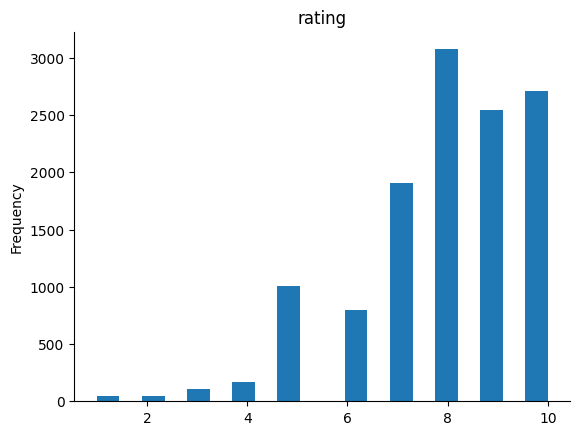

In [17]:
# @title rating

from matplotlib import pyplot as plt
full_df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
full_df.isnull().sum()

isbn      0
title     0
author    0
user      0
rating    0
dtype: int64

In [8]:
(full_df == 0).sum()

isbn          0
title         0
author        0
user          0
rating    36585
dtype: int64

In [9]:
full_df = full_df.loc[full_df['rating'] != 0]

In [10]:
(full_df == 0).sum()

isbn      0
title     0
author    0
user      0
rating    0
dtype: int64

In [ ]:
# –í—ã—á–∏—Å–ª—è–µ–º —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ ISBN, –∏—Å–∫–ª—é—á–∞—è –Ω—É–ª–∏
# isbn_mean_ratings = filtered_ratings[filtered_ratings['rating'] != 0].groupby('isbn')['rating'].mean()
# –§—É–Ω–∫—Ü–∏—è –¥–ª—è –∑–∞–º–µ–Ω—ã –Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ
def replace_zero_with_mean(row):
    if row['rating'] == 0:
        return isbn_mean_ratings[row['isbn']]
    else:
        return row['rating']

# –ü—Ä–∏–º–µ–Ω—è–µ–º —Ñ—É–Ω–∫—Ü–∏—é –∫ DataFrame
# filtered_ratings['rating'] = filtered_ratings.apply(replace_zero_with_mean, axis=1)
# print("DataFrame –ø–æ—Å–ª–µ –∑–∞–º–µ–Ω—ã –Ω—É–ª–µ–≤—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –Ω–∞ —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –¥–ª—è –∫–∞–∂–¥–æ–≥–æ ISBN:")
# print(filtered_ratings)

In [25]:
full_df_pivot = full_df.pivot(index='isbn', columns='user', values='rating').fillna(0)

In [26]:
full_df_pivot

user        254     2276    2766    2977    3363    4017    4385    6242    \
isbn                                                                         
002542730X     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0060008032     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0060096195     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
006016848X     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0060173289     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...            ...     ...     ...     ...     ...     ...     ...     ...   
1573227331     0.0     0.0     0.0     0.0     0.0     0.0     0.0     6.0   
1573229326     0.0     0.0     0.0     0.0     0.0     0.0     0.0     6.0   
1573229571     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1592400876     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1878424319     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

user        6251    6323    ...  273979  274004  274061  274301  274308  \
isbn                        ...                                           
002542730X     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
0060008032     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
0060096195     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
006016848X     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
0060173289     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
...            ...     ...  ...     ...     ...     ...     ...     ...   
1573227331     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
1573229326     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
1573229571     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
1592400876     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   
1878424319     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0   

user        274808  275970  277427  277639  278418  
isbn                                                
002542730X     0.0     0.0    10.0     0.0     0.0  
0060008032     0.0     0.0     0.0     0.0     0.0  
0060096195     0.0     0.0     0.0     0.0     0.0  
006016848X     0.0     0.0     0.0     0.0     0.0  
0060173289     0.0     0.0     0.0     0.0     0.0  
...            ...     ...     ...     ...     ...  
1573227331     0.0     0.0     0.0     0.0     0.0  
1573229326     0.0     0.0     0.0     0.0     0.0  
1573229571     0.0     0.0     0.0     0.0     0.0  
1592400876     0.0     0.0     0.0     0.0     0.0  
1878424319     0.0     0.0     0.0     0.0     0.0  

[717 rows x 827 columns]

In [52]:
# add your code here - consider creating a new cell for each section of code
X = full_df_pivot.values

# –°–æ–∑–¥–∞–Ω–∏–µ –∏ –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏ K-–±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)
model.fit(X)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

In [55]:
# book_user_matrix
# –î–æ—Å—Ç–∞–Ω–µ–º isbn
current_isbn = full_df[full_df['title'] == "Where the Heart Is (Oprah's Book Club (Paperback))"].iloc[0]['isbn']
print(current_isbn)
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ numpy —Å—Ç—Ä–æ–∫—É —Å –æ—Ü–µ–Ω–∫–∞–º–∏ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ isbn
full_df_pivot.loc[current_isbn].values.reshape(1, -1)
# –ù–∞–π–¥–µ–º –ø–æ–¥—Ö–æ–¥—è—â–∏–µ –∫–Ω–∏–≥–∏ –ø–æ –º–æ–¥–µ–ª–∏
distances, indices = model.kneighbors(full_df_pivot.loc[current_isbn].values.reshape(1, -1), n_neighbors=6)
print("–†–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π:", distances)
print("–ò–Ω–¥–µ–∫—Å—ã –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π:", indices)


0446672211
–†–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π: [[0.         0.7230184  0.76770747 0.7699411  0.77085835 0.8016211 ]]
–ò–Ω–¥–µ–∫—Å—ã –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π: [[427 104  26 178 116 614]]


In [56]:
recommended_books = []
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º indices –≤ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤, –∏–Ω–∞—á–µ —Ä–∏—Å—É–µ—Ç –∫—Ä–∞–∫–æ–∑—è–±—Ä—É...
indices = indices.flatten()
distances = distances.flatten()
for i in range(len(indices)):

  isbn = full_df_pivot.index[indices[i]]

  if distances[i] == 0:
    recommended_books.append(full_df[full_df['isbn'] == isbn].iloc[0]['title'])
    recommended_books.append([])
  else:
    recommended_books[1].append([full_df[full_df['isbn'] == isbn].iloc[0]['title'], distances[i]])

  # –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞—Ç—å —ç—Ç–æ –≤—Å–µ

recommended_books

["Where the Heart Is (Oprah's Book Club (Paperback))",
 [['The Lovely Bones: A Novel', 0.7230184],
  ['I Know This Much Is True', 0.76770747],
  ['The Surgeon', 0.7699411],
  ['The Weight of Water', 0.77085835],
  ["I'll Be Seeing You", 0.8016211]]]

In [ ]:
recommended_books = []
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º indices –≤ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤, –∏–Ω–∞—á–µ —Ä–∏—Å—É–µ—Ç –∫—Ä–∞–∫–æ–∑—è–±—Ä—É...
indices = indices.flatten()
for el in indices:
  isbn = full_df_pivot.index[el]
  try:
    print(full_df[full_df['isbn'] == isbn].iloc[0]['title'])
    recommended_books.append(full_df[full_df['isbn'] == isbn].iloc[0]['title'])
  except Exception as e:
    pass

# –§—É–Ω–∫—Ü–∏—è –ø–æ–¥–±–æ—Ä–∞ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π
1. –ù–∞–π—Ç–∏ isbn –∫–Ω–∏–≥–∏ –≤ df book
2. –ù–∞–π—Ç–∏ –ø–æ isbn –∑–∞–ø–∏—Å—å –≤ —Ñ–∏–ª—å—Ç–µ—Ä–µ–¥_–¥–∞—Ç–∞—Ñ—Ä–µ–π–º
3. model.fit()
4. –û—Ç–ø—Ä–∞–≤–∏—Ç—å —ç—Ç—É —Å—Ç—Ä–æ–∫—É –Ω–∞ –ø–æ–¥–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö



```
[
  'The Queen of the Damned (Vampire Chronicles (Paperback))',
  [
    ['Catch 22', 0.793983519077301],
    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479],
    ['Interview with the Vampire', 0.7345068454742432],
    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
  ]
]
```



In [42]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):

  # –î–æ—Å—Ç–∞–Ω–µ–º isbn
  current_isbn = full_df[full_df['title'] == book].iloc[0]['isbn']
  # print(current_isbn)
  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ numpy —Å—Ç—Ä–æ–∫—É —Å –æ—Ü–µ–Ω–∫–∞–º–∏ –≤—ã–±—Ä–∞–Ω–Ω–æ–≥–æ isbn
  full_df_pivot.loc[current_isbn].values.reshape(1, -1)
  # –ù–∞–π–¥–µ–º –ø–æ–¥—Ö–æ–¥—è—â–∏–µ –∫–Ω–∏–≥–∏ –ø–æ –º–æ–¥–µ–ª–∏
  distances, indices = model.kneighbors(full_df_pivot.loc[current_isbn].values.reshape(1, -1), n_neighbors=5)
  # print("–†–∞—Å—Å—Ç–æ—è–Ω–∏—è –¥–æ –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π:", distances)
  # print("–ò–Ω–¥–µ–∫—Å—ã –±–ª–∏–∂–∞–π—à–∏—Ö —Å–æ—Å–µ–¥–µ–π:", indices)
  recommended_books = []
  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º indices –≤ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤, –∏–Ω–∞—á–µ —Ä–∏—Å—É–µ—Ç –∫—Ä–∞–∫–æ–∑—è–±—Ä—É...
  indices = indices.flatten()
  distances = distances.flatten()
  for i in range(len(indices)):

    isbn = full_df_pivot.index[indices[i]]

    if distances[i] == 0:
      recommended_books.append(full_df[full_df['isbn'] == isbn].iloc[0]['title'])
      recommended_books.append([])
    else:
      recommended_books[1].append([full_df[full_df['isbn'] == isbn].iloc[0]['title'], distances[i]])

  return recommended_books

In [44]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)


def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! üéâüéâüéâüéâüéâ")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [['The Lovely Bones: A Novel', 0.7230184], ['I Know This Much Is True', 0.76770747], ['The Surgeon', 0.7699411], ['The Weight of Water', 0.77085835]]]
You haven't passed yet. Keep trying!
